# COGS 108 - Final Project 

# Overview

This project attempts to inspect the relationship in restaurants and school cafeteras between the rate they get inspected, the poverty rate of the zip code they are located, and the inspection scores resulting from inspection. To do this, I split a dataset into two (one looking at restaurants, and one looking at schools) and looked at the correlation between previously mentioned variables. Results showed that correlation between these variables was low except for the correlation in schools between average inspection score and rate of inspection.

# Name & GitHub

- Name: George Robinson-Salazar
- GitHub Username: TheSpaceant

# Research Question

In North Carolina, is average inspection score for a restaurant or the poverty level of a restaurant's zip code a better indicator of a high rate of inspection? Is this the same for public school cafeterias?

## Background and Prior Work

Previous work has been done on topics adjacent to my research question. Some basics around what we know about food inspection scoring (at least in Tennessee) can be found in the paper *Restaurant Inspection Scores and Foodborne Disease*. According to this paper food inspections’ presence has lowered the rate of foodborne illnesses since 1993. Additionally we know that low scoring restaurants, after inspected, are likely to get a much better score on their next inspection. More specifically, restaurants that score under 60 have an average improvement of 16 points on their next visit. 

*Inspection Frequency, Sociodemographic Factors, and Food Safety Violations in Chain and Nonchain Restaurants, Philadelphia, Pennsylvania, 2013-2014* although lacking a succinct title, is a study that has a question much closer to mine. This study looked to find if inspection frequency and socioeconomic factors like poverty had impact on the outcome of inspections. They also, however, looked at chain restaurants and nonchain restaurants differently. They found that the best approach forward where to put more focus into inspecting restaurants with previously low scores, something they found was not already being done.

What we do not know is if the rate of inspection is correlated with the inspection scores that a restaurant or public school gets. In addition, we don’t know how public schools compare to restaurants in these variables and their correlations 

References:
- 1) Jones, T. F., Pavlin, B. I., LaFleur, B. J., Ingram, L. A., & Schaffner, W. (2004). Restaurant inspection scores and foodborne disease. Emerging infectious diseases, 10(4), 688–692. https://doi.org/10.3201/eid1004.030343
- 2) Leinwand, S. E., Glanz, K., Keenan, B. T., & Branas, C. C. (2017). Inspection Frequency, Sociodemographic Factors, and Food Safety Violations in Chain and Nonchain Restaurants, Philadelphia, Pennsylvania, 2013-2014. Public health reports (Washington, D.C. : 1974), 132(2), 180–187. https://doi.org/10.1177/0033354916687741

# Hypothesis


My hypothesis is that a high poverty level in a zip code will result in less frequent health inspections, and that high poverty zip codes will need testing the most due to low scores. I think this is the case because lower income areas are going to be paying less taxes, and less taxes means less community oversight. Additionally, poorer communities are often overlooked and seen as unimportant. I think restaurants, however, will differ from schools due to the oversight school cafeterias have.  

# Dataset(s)

- Dataset Name: zipcodes.csv
- Number of observations: 37

This data set provides the average income and percent poverty level at given zip codes. The poverty levels are useful to me.

- Dataset Name: inspections.csv
- Number of observations: 
    - original : 18466 
    - after removing new businesses : 14799 
    - valid restaurant inspections : 9167
    - valid school inspections : 1547
    
This data set provides data health inspections across North Carolina, including the scores earned at each individual health inspection. This set can also allow us to see how many inspections took place at a given restaurant from Sept. 21, 2012 to Nov. 3, 2016.


To combine these data sets, I will make the zip code data into a dictionary that can then be used to make a new column on the inspection data. 

# Setup

In [316]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
sns.set_context('talk')
pd.reset_option('^display.', silent=True)

# Data Cleaning

Describe your data cleaning steps here.

In [317]:
## import zipcodes.csv and inspections.csv as tataframes
df_zip = pd.DataFrame(pd.read_csv('zipcodes.csv'))
df_insp = pd.DataFrame(pd.read_csv('inspections.csv'))

In [318]:
## remove unused columns
df_insp = df_insp[['hsisid', 'date', 'restaurantopendate', 'zip', 'facilitytype', 'score']]
df_zip = df_zip[['zip', 'percent_damilies_below_poverty_line']]

## remove any buisnessesthat opened after the first inspection, as it is possible they have had less inspections
day_one = df_insp['date'].min()
df_insp = df_insp.loc[df_insp['restaurantopendate'] < day_one]

In [319]:
## remove date and restrauntopendate as unnecessary
df_insp = df_insp[['hsisid', 'zip', 'facilitytype', 'score']]

## add poverty rate column do data set based on zip code
## create dictionary of zip:poverty
zip_dict = pd.Series(df_zip.percent_damilies_below_poverty_line.values, index = df_zip.zip).to_dict()

## add to inspections
df_insp['poverty'] = df_insp['zip'].map(zip_dict)

In [320]:
## split restaurants and public school lunchrooms from the rest of data
df_schools = df_insp.loc[df_insp['facilitytype'] == 'Public School Lunchrooms']
df_rest = df_insp.loc[df_insp['facilitytype'] == 'Restaurant']

## remove facilitytype as no longer useful
df_schools = df_schools[['hsisid', 'zip', 'score', 'poverty']]
df_rest = df_rest[['hsisid', 'zip', 'score', 'poverty']]

## remove restraunts with zipcodes outisde our dataset (NaN values)
df_rest = df_rest.dropna()
df_schools = df_schools.dropna()

In [321]:
## this may be some silly code but i couldnt think of how else to do this and i think this is a cool solution so
## add count columns to df_rest and df_schools
df_rest['count'] = 1
df_schools['count'] = 1

In [322]:
## use groupby to sum together all columns with the same id
## count is now the number of inspections and score/count is the average score
## zip and poverty go back to normal when divided by count
df_rest = df_rest.groupby('hsisid').sum()
df_schools = df_schools.groupby('hsisid').sum()

## divide all other columns by count
df_rest[['score','zip', 'poverty']] = df_rest[['score','zip', 'poverty']].div(df_rest['count'], axis = 0)
df_schools[['score','zip', 'poverty']] = df_schools[['score','zip', 'poverty']].div(df_schools['count'], axis = 0)

## removing zip
df_rest = df_rest[['score', 'poverty', 'count']]
df_schools = df_schools[['score', 'poverty', 'count']]

# Data Analysis & Results

I'll first start by looking at the distributions in my data to get a general feel for what correlations may exist in the data. I'll be using a scatter matrix as that is the quickest way to have a summary of my data visualizations. 

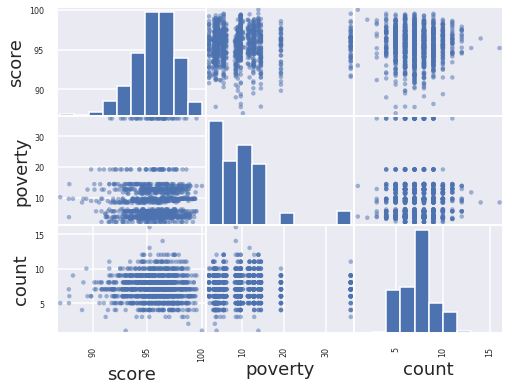

In [323]:
pd.plotting.scatter_matrix(df_rest, figsize = (8,6))
f4 = plt.gcf()

Immediately, I am drawn to the fact that we have these very clear lines and overlapping values due to the fact that count is an integer and that poverty has a set number of values. This effect can be negated, however, by adding a jitter to final visualizations. It could also do us well to use a stripplot as count is acting more like a categorical variable. 

It is hard to glean information from our scatter plots of our scatter matrix, but the histograms still hold value information. our scores are more or less normally distributed with a skew to the left, which is to be expected as score caps at 100. Poverty is more or less 15% or lower, but there are two clear clumps of restaurants, likely that all share the same zip code. Count seems to average around 7 or 8 inspections and also seems to be normally distributed.

The question now is will the data from schools be significantly different

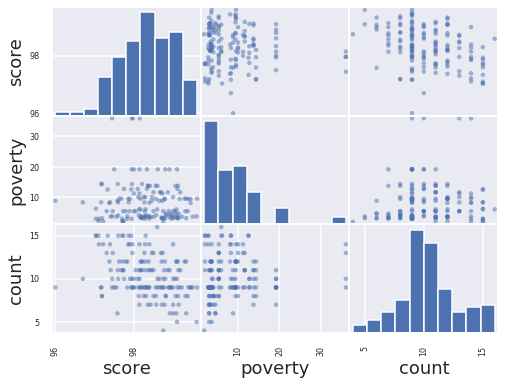

In [324]:
pd.plotting.scatter_matrix(df_schools, figsize = (8,6))
f4 = plt.gcf()

There are a lot of key differences in this data that make me excited to start running finding out correlations but let's first look at this scatter matrix, particularly the histograms. The first thing that jumps out at me is the poverty histogram. particularly, it looks like the number of public schools lowers faster than the number of restaurants. This, however, could be just due to sample size, and also is unrelated to this project. More related, are the fact that the scores have a much higher range than the scores of restaurants. This is to be expected as its likely that school cafeterias are held to higher standards to restaurants. Count is interesting as well. It is clear that on average they are more likely to get more inspections than restaurants. 

Let's now take a closer look at those correlations.

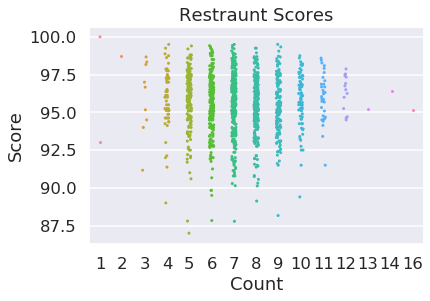

In [325]:
rest_score_plt = sns.stripplot(x='count', y='score', data=df_rest, jitter=1, size = 3).set(title = 'Restraunt Scores', xlabel = 'Count', ylabel = 'Score')

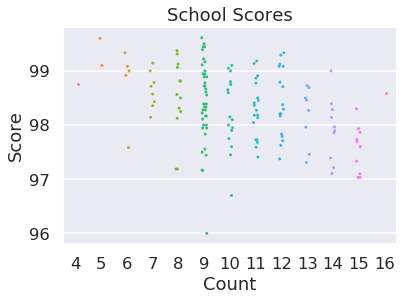

In [326]:
school_score_plt = sns.stripplot(x='count', y='score', data=df_schools, jitter=1, size = 3).set(title = 'School Scores', xlabel = 'Count', ylabel = 'Score')

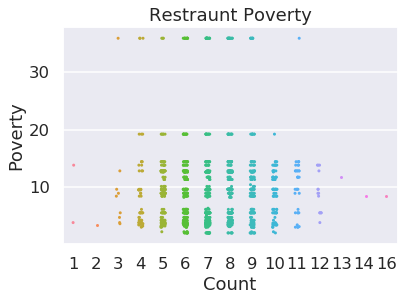

In [327]:
rest_poverty_plt = sns.stripplot(x='count', y='poverty', data=df_rest, jitter=1, size = 3).set(title = 'Restraunt Poverty', xlabel = 'Count', ylabel = 'Poverty')

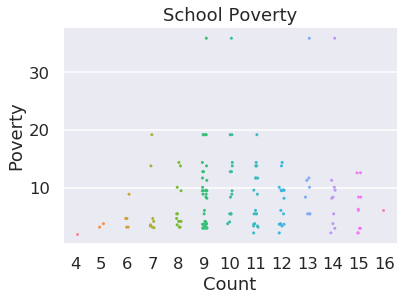

In [328]:
school_poverty_plt = sns.stripplot(x='count', y='poverty', data=df_schools, jitter=1, size = 3).set(title = 'School Poverty', xlabel = 'Count', ylabel = 'Poverty')

In [329]:
rest_corrs = df_rest.corr()
school_corrs = df_schools.corr()
print('Restraunts')
print(rest_corrs)
print("\nSchools")
print(school_corrs)

Restraunts
            score   poverty     count
score    1.000000 -0.009933 -0.035625
poverty -0.009933  1.000000  0.024728
count   -0.035625  0.024728  1.000000

Schools
            score   poverty     count
score    1.000000 -0.084783 -0.366504
poverty -0.084783  1.000000  0.080679
count   -0.366504  0.080679  1.000000


Very surprisingly, there is not a lot of correlation being shown between these variables. I was fairly confident that there would be correlation in each of these variables and that I would be comparing degrees of correlations, but I guess I was wrong. The most correlated stat, and you can see this clearly in the School Scores graph, are the school's scores and count. This is most surprising, however, when looking at a restaurant's score vs count which does not have this same correlation. My interpretation of this is that due to much more oversight, schools with poorer inspection scores get more repeat visits than restaurants.  

# Ethics & Privacy

Ethics

There are ethical concerns to this project, mainly in that there was a possibility that the data showed restaurants within communities with high poverty rates were not getting the inspection they needed. This could unfortunately be used to target businesses in more impoverished zip codes and that could have an effect on already struggling small business owners within these communities. There, however, is a clear tradeoff here as in that same scenario, rates of foodborne illness would likely decline, resulting in better health conditions for residents in high poverty areas. A more apt concern may be data results could be a way to encourage classism by claiming that poorer communities remain poor because they don’t take into consideration cleanliness or a claim similar. The best way to combat this if this project did show those results it to insure you contextualize the issue as a lack of resources in impoverished communities that caused this. 

Privacy

As the data used is all publicly available information that is about businesses and school and not individuals, there are very few privacy concerns. This however, is not a reason to ignore privacy. There is no need to publish the names of businesses and their phone numbers tied to poor inspection scores, this can bring unwanted attention to that business, so that information was stripped early in favor of the IDs associated in the dataset. 

# Conclusion & Discussion

Poverty isn’t a large contributing factor to the rate at which restaurants are inspected, but previous inspection scores aren’t either. I find this troubling, especially when schools do have an increased inspection rate dependent on previous scores. What this means to me is that although, as we saw in the background, health inspections have likely helped slow the rate of foodborne illness, we also aren’t doing the best we can. Health inspections of schools have seemingly become efficient enough to target their inspections, and it’s unfortunate the same can’t be said of restaurant inspection. My reccomendation will follow the same lines as the Leinwand et al. paper. If you want to minimize foodborne illness and maximize the efficentcy of health inspections, a targeted approach should be utalized. 